In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
import statsmodels.api as sm

In [479]:
path = r'C:\Users\Ananya\Documents\World Happiness Report'

In [480]:
report = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'overall.csv'))

# Step 3 - Subset of data

In [481]:
report.head()

,Date,Year,RANK,Country,Region,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,12/31/2022,2022,146,Afghanistan,Southern Asia,2.404,0.758,0.000,0.289,0.000,0.089,0.005
1,12/31/2022,2022,90,Albania,Central and Eastern Europe,5.199,1.439,0.646,0.719,0.511,0.138,0.028
2,12/31/2022,2022,96,Algeria,Middle East and Northern Africa,5.122,1.363,0.970,0.643,0.146,0.106,0.150
3,12/31/2022,2022,57,Argentina,Latin America and Caribbean,5.967,1.592,1.102,0.662,0.555,0.081,0.085
4,12/31/2022,2022,82,Armenia,Central and Eastern Europe,5.399,1.434,0.820,0.668,0.558,0.054,0.210


In [482]:
report.columns

Index(['Date', 'Year', 'RANK', 'Country', 'Region', 'Happiness score',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [483]:
report_selected = report[['Year', 'Happiness score']]

In [484]:
report_selected.head()

,Year,Happiness score
0,2022,2.404
1,2022,5.199
2,2022,5.122
3,2022,5.967
4,2022,5.399


In [485]:
report_selected.columns

Index(['Year', 'Happiness score'], dtype='object')

# Step 4 - Create a linechart

In [486]:
report_selected.set_index('Year', inplace=True)

In [487]:
# Calculate yearly happiness
yearly_happiness = report_selected.groupby(report_selected.index)['Happiness score'].mean().rename("Happiness score")


In [488]:
yearly_happiness

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
2020    5.473240
2021    5.532839
2022    5.553575
Name: Happiness score, dtype: float64

In [489]:
yearly_happiness = yearly_happiness.reset_index()

In [490]:
yearly_happiness

,Year,Happiness score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096
5,2020,5.473240
6,2021,5.532839
7,2022,5.553575


In [491]:
yearly_happiness['Date'] = pd.to_datetime(yearly_happiness['Year'], format='%Y')

In [492]:
yearly_happiness

,Year,Happiness score,Date
0,2015,5.375734,2015-01-01
1,2016,5.382185,2016-01-01
2,2017,5.354019,2017-01-01
3,2018,5.375917,2018-01-01
4,2019,5.407096,2019-01-01
5,2020,5.473240,2020-01-01
6,2021,5.532839,2021-01-01
7,2022,5.553575,2022-01-01


In [493]:
# Set the 'Date' column as the index
yearly_happiness.set_index('Date', inplace=True)

In [494]:
yearly_happiness

,Year,Happiness score
Date,,
2015-01-01,2015,5.375734
2016-01-01,2016,5.382185
2017-01-01,2017,5.354019
2018-01-01,2018,5.375917
2019-01-01,2019,5.407096
2020-01-01,2020,5.473240
2021-01-01,2021,5.532839
2022-01-01,2022,5.553575


In [495]:
# Drop the 'Year' column (optional)
yearly_happiness.drop(columns=['Year'], inplace=True)

In [496]:
yearly_happiness

,Happiness score
Date,
2015-01-01,5.375734
2016-01-01,5.382185
2017-01-01,5.354019
2018-01-01,5.375917
2019-01-01,5.407096
2020-01-01,5.473240
2021-01-01,5.532839
2022-01-01,5.553575


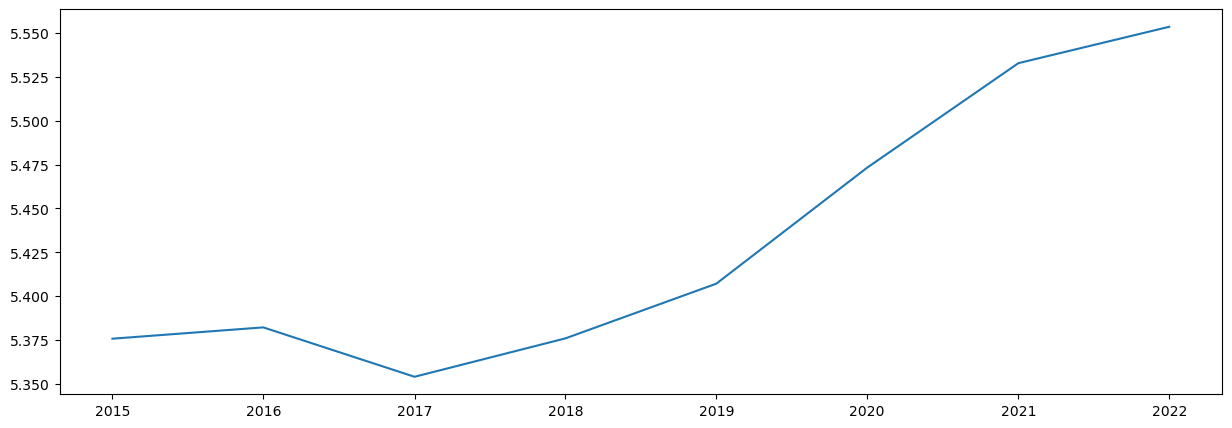

In [497]:
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(yearly_happiness)

# Step 5: Decompose the data’s components

In [498]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(yearly_happiness, model='additive', period=1)

In [499]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 10, 8

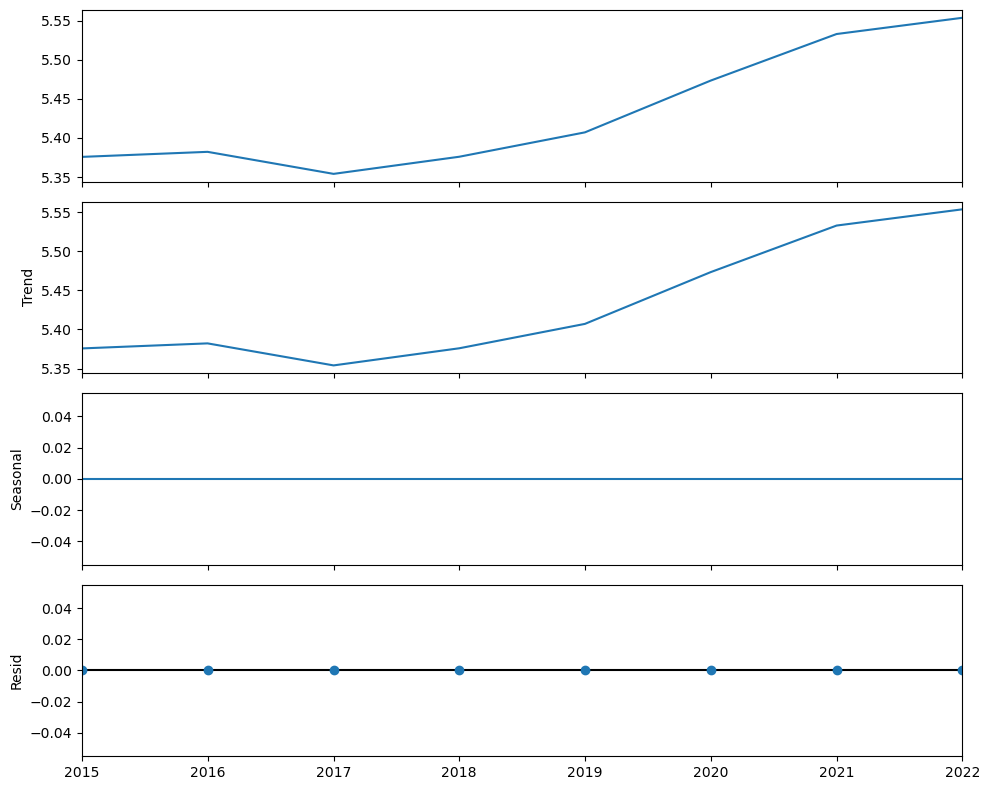

In [500]:
# Plot separate components
decomposition.plot()
plt.show()

# Step 6: Dickey-Fuller test

In [501]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(yearly_happiness['Happiness score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.183196e+01
p-value                        7.952465e-22
Number of Lags Used            2.000000e+00
Number of Observations Used    5.000000e+00
Critical Value (1%)           -6.045114e+00
Critical Value (5%)           -3.929280e+00
Critical Value (10%)          -2.986810e+00
dtype: float64


As the test statistic is greater than the critical value, data may need to be stationarized.

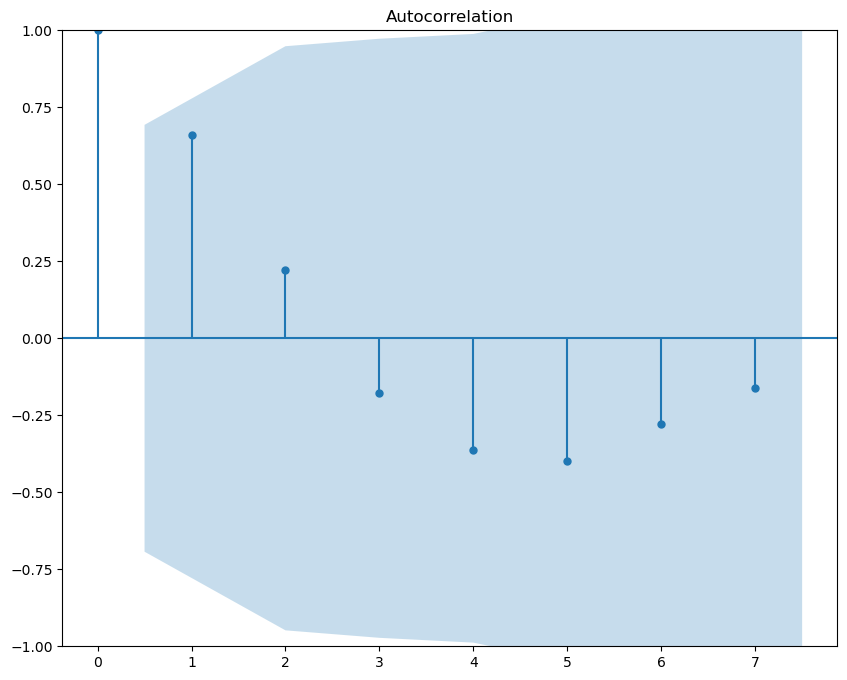

In [502]:
# Plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(yearly_happiness)
plt.show()

# Step 7 - Round of differencing

In [503]:
data_diff = yearly_happiness - yearly_happiness.shift(1) 

In [504]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)

In [505]:
data_diff

,Happiness score
Date,
2016-01-01,0.006451
2017-01-01,-0.028165
2018-01-01,0.021897
2019-01-01,0.031179
2020-01-01,0.066144
2021-01-01,0.059599
2022-01-01,0.020736


In [506]:
data_diff.columns

Index(['Happiness score'], dtype='object')

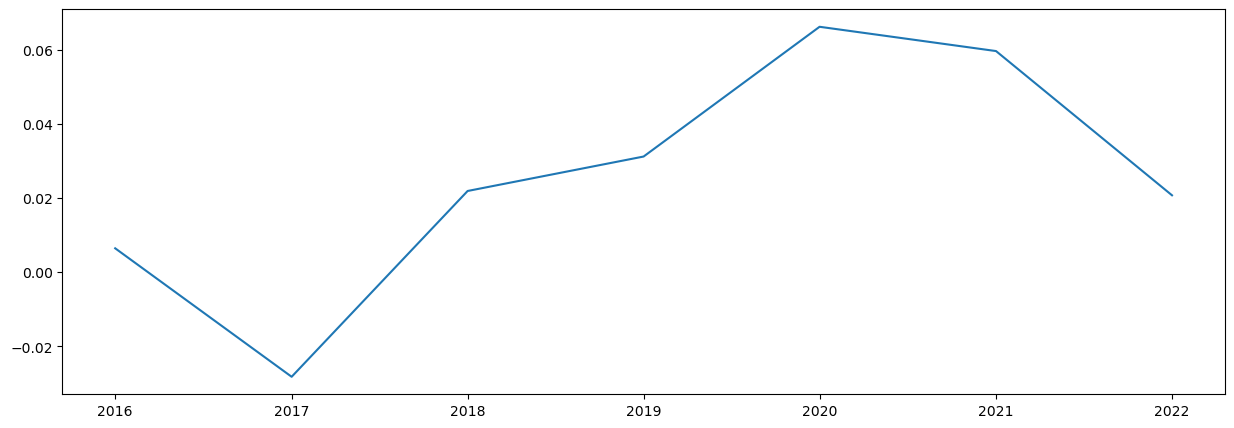

In [507]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [508]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.312326
p-value                        0.623514
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Test statistic is now closer to both the Critical Values 5% and 10% 

# Step 8 - Additional round of differencing is not required

# Step 9 - Auto correlations

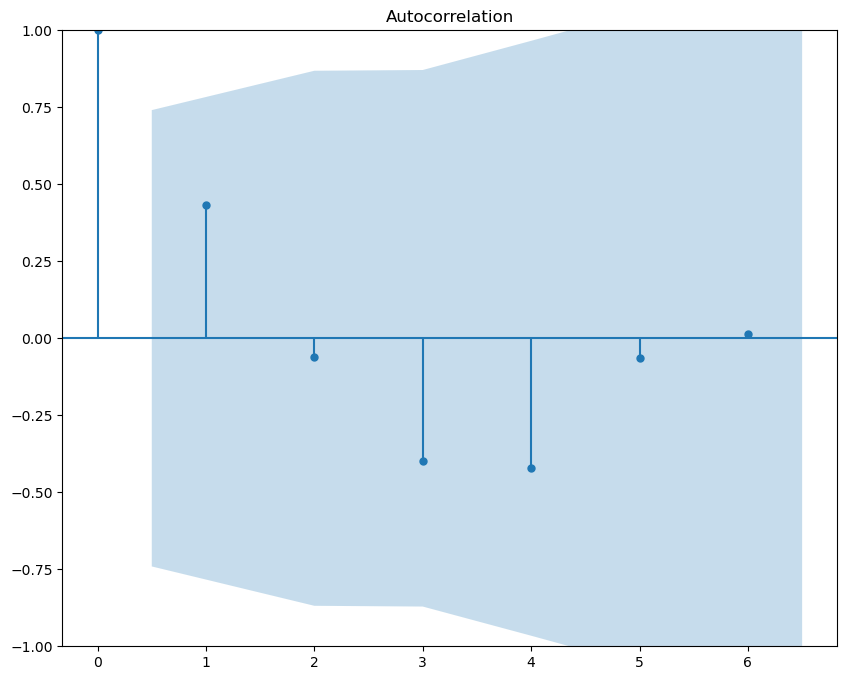

In [509]:
plot_acf(data_diff)
plt.show()